In [ ]:
import pandas as pd
import requests
import io

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Access Data

In [ ]:
url = 'https://drive.google.com/uc?id=1RkoTj_yc3o99xDfzmE8q7QFURhf3FwdS'
df = pd.read_csv(io.StringIO(requests.get(url).content.decode("utf-8")))
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
print("Demension of the dataset:")
df.shape

Demension of the dataset:


(4424, 35)

#**Data Description**
(just some basic explanation, we can consider copying and paraphrasing the description on kaggle, or just ignore that part. It looks not too important for our project)




|column name | Description |
|--------------------|-------------------|
| | |


#**Data Preprocessing**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print("Target : ")
print(df['Target'].unique())

Target : 
['Dropout' 'Graduate' 'Enrolled']


As we can see, there are three different elements in "Target". So, we can assign that: Dropout = 0, Graduate = 1, Enrolled = 2.

In [ ]:
class_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled' : 2}
df['Target'] = df['Target'].map(class_mapping)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


**Preprocessing one-hot encoding**

By the Data Description, we can know Application order, Age at enrollment, Curricular units 1st sem (credited),
Curricular units 1st sem (enrolled),
Curricular units 1st sem (evaluations),
Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), curricular units 2nd sem (enrolled)	Curricular units 2nd sem (evaluations),	Curricular units 2nd sem (approved),	Curricular units 2nd sem (grade),	Curricular units 2nd sem (without evaluations),	Unemployment rate, Inflation rate and GDP are numerical variables. 

If it is not a numerical variable, then it is a categorical variable.

In order to use one-hot encoding, we need to convert categorical variables into a numerical representation.

Thus, we need to one hot encode those categorical variables.


In [ ]:
cats = ['Marital status',	'Application mode', 'Course', 'Daytime/evening attendance',	'Previous qualification', 'Nacionality',	"Mother's qualification",	"Father's qualification",	"Mother's occupation", \
         "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender',	'Scholarship holder', 'International'] 
print("Unique elements:")
for cat in cats:
    print(df[cat].unique()) 


Unique elements:
[1 2 4 3 5 6]
[ 8  6  1 12  9 17 15 16 14  4 13  7  3  2  5 18 10 11]
[ 2 11  5 15  3 17 12 10 14 16  6  8 13  9  4  1  7]
[1 0]
[ 1 12 16 14  8  3 15  2  4  9 17 11  6  7 13  5 10]
[ 1 15  3 14 12 18  5 11  8 17  4  9 13 16 10 21  2 20 19  6  7]
[13  1 22 23  3  4 27  2 19 10 25  7  5 24  9 26 18 11 20 21  6  8 17 28
 12 14 16 15 29]
[10  3 27 28  1 14  5  4 24  2 29  9  7 26 18 30 12 15 25 31 16 11 20 33
 13 32  8  6 21 17 34 23 19 22]
[ 6  4 10  8  5  2 16  1  7  3 12  9 20 28 13 29 23 32 30 18 24 19 11 21
 15 27 31 14 22 17 26 25]
[10  4  8 11  6  9  5  2  3 22  7  1 12 39 19 13 29 46 43 34 44 30 41 24
 23 45 35 26 28 36 16 37 31 42 20 15 40 25 21 17 32 38 27 18 14 33]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]


In [ ]:
print(df.columns[df.isna().any()])
df = df.fillna(0)

Index([], dtype='object')


In [ ]:
print(df.shape)
display(df.head(5))

(4424, 35)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe, columns=cats)
df_ohe

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),...,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,5,20,0,0,0,0,0.000000,0,0,0,...,1,0,0,1,0,1,1,0,1,0
1,1,19,0,6,6,6,14.000000,0,0,6,...,1,0,1,0,0,1,1,0,1,0
2,5,19,0,6,0,0,0.000000,0,0,6,...,1,0,1,0,0,1,1,0,1,0
3,2,20,0,6,8,6,13.428571,0,0,6,...,1,0,0,1,1,0,1,0,1,0
4,1,45,0,6,9,5,12.333333,0,0,6,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,19,0,6,7,5,13.600000,0,0,6,...,1,0,0,1,0,1,1,0,1,0
4420,2,18,0,6,6,6,12.000000,0,0,6,...,0,1,1,0,1,0,1,0,0,1
4421,1,30,0,7,8,7,14.912500,0,0,8,...,1,0,0,1,1,0,0,1,1,0
4422,1,20,0,5,5,5,13.800000,0,0,5,...,1,0,0,1,1,0,0,1,1,0


In [ ]:
print("Features of the dataset :")
print(df.describe(include = 'all'))

Features of the dataset :
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
mi

# **Exploratory Data Analysis**

to do: leo kim

In [ ]:
#not done
#reference paper from dataset in last page has categorical values meanings: https://www.mdpi.com/2306-5729/7/11/146
#will use Discussion 2 - Exploratory Data Analysis.ipynb for eda plots
#other ref: https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184
import seaborn as sns
eda = df.copy()
# display(eda)

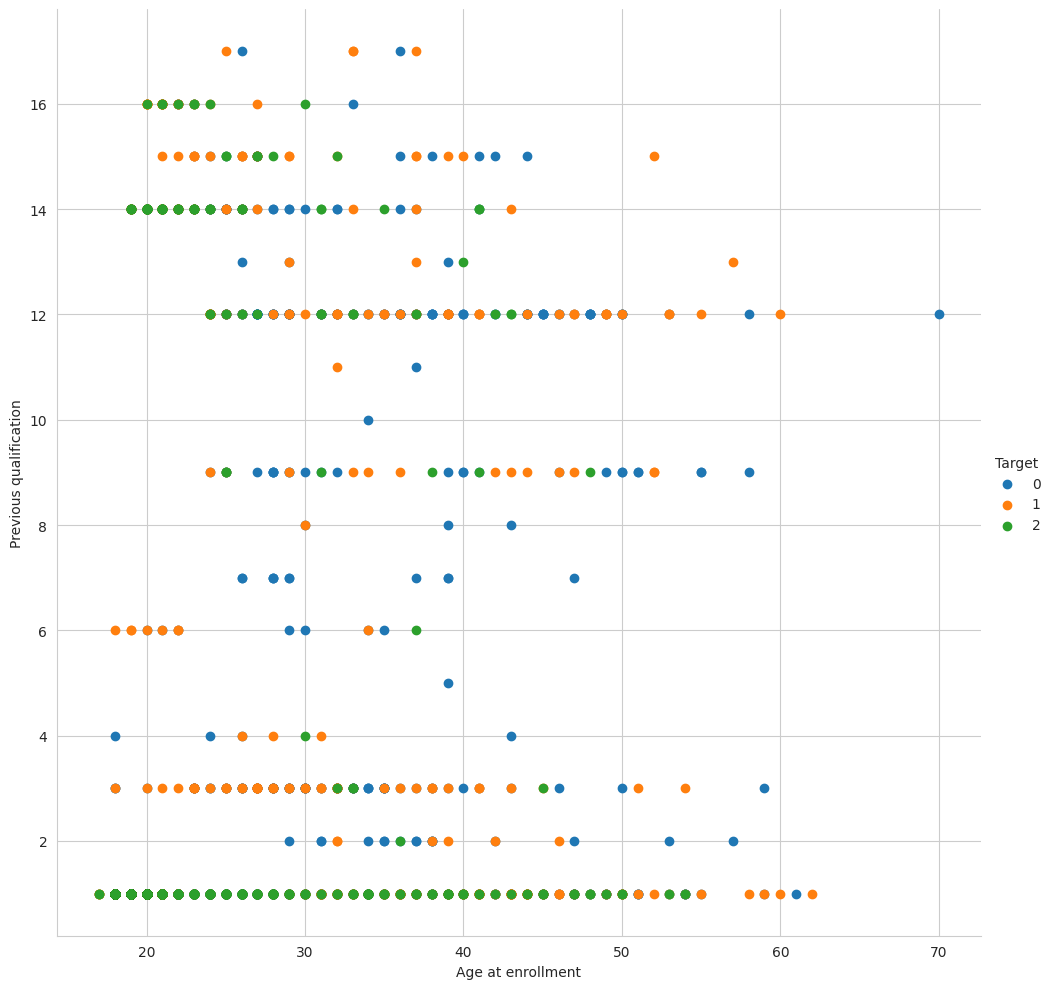

In [ ]:
#example of looking at any two notable attributes and if they are linked with dropout (0), success (1), or still enrolled (2)
sns.set_style("whitegrid")
sns.FacetGrid(eda, hue="Target", height=10) \
    .map(plt.scatter, "Age at enrollment", "Previous qualification") \
    .add_legend()
plt.show()

Target Values: Dropout = 0, Graduate = 1, Enrolled = 2.
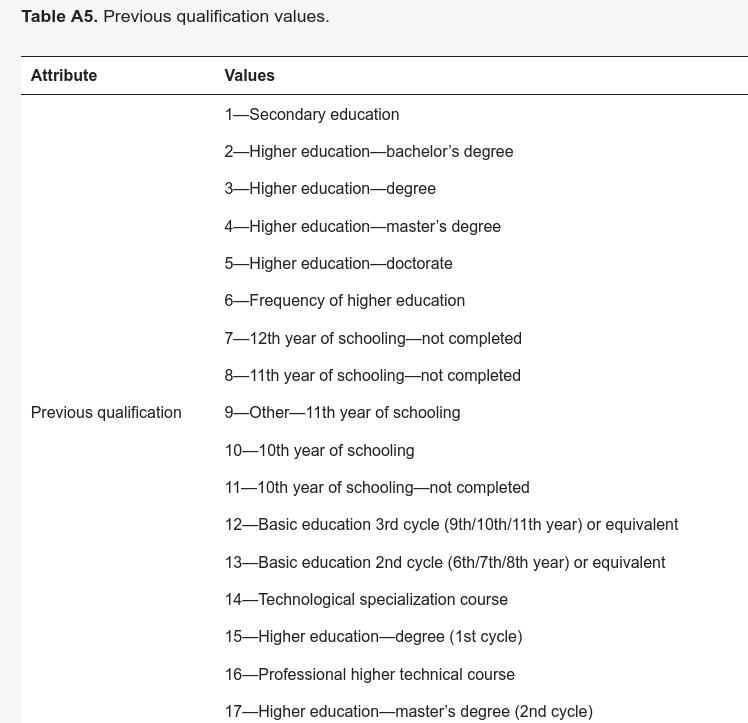

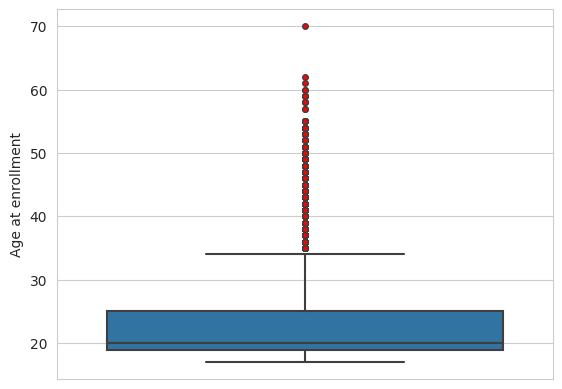

Average age at enrollment: 23.265144665461122


In [ ]:
#example of looking at outliers for the particular attribute, age of enrollment
sns.boxplot(y='Age at enrollment', flierprops={"marker":"o", "markerfacecolor":"red", "markersize":4,}, data=eda)
plt.show()
print("Average age at enrollment:", np.mean(eda['Age at enrollment']))

# **Polynomial Regression**

to do: arya

# **Logistic Regression**

*split* the data by 8:2

In [ ]:
data = df_ohe.copy()
train, test = train_test_split(data, test_size=0.2, random_state=48)

X_train, y_train = train.drop(columns=['Target']) ,train['Target']
X_test, y_test = test.drop(columns=['Target']), test['Target']


train the model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       283
           1       0.78      0.91      0.84       441
           2       0.64      0.30      0.41       161

    accuracy                           0.77       885
   macro avg       0.73      0.68      0.68       885
weighted avg       0.76      0.77      0.75       885



In [ ]:
y_pred = lr_model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.768361581920904


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(y_test, y_pred))


Confusion Matrix for each label : 
[[[541  61]
  [ 53 230]]

 [[328 116]
  [ 40 401]]

 [[696  28]
  [112  49]]]


# **K-fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

data.drop(data[data["Target"]==2].index,inplace=True)
accuracy_scores = []

X = data.drop('Target', axis = 1)
y = data['Target']

X = X.values
y = y.values

kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr_model = LogisticRegression(max_iter = 10000)

    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores:", accuracy_scores)
print("Average accuracy:", average_accuracy)

Accuracy scores: [0.9256198347107438, 0.9146005509641874, 0.9228650137741047, 0.8980716253443526, 0.9090909090909091, 0.8980716253443526, 0.90633608815427, 0.9173553719008265, 0.9118457300275482, 0.9118457300275482]
Average accuracy: 0.9115702479338843


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119  22]
 [ 10 212]]


# **FeedForward Neural Network**
to do: srivatsan